In [1]:
import os
import glob
import pandas as pd


configs = dict()
configs['TRAIN_FOLDER'] =  "D:/dataset/2day/train"
configs['TEST1_FOLDER'] =  "D:/dataset/2day/test1"
configs['TEST2_FOLDER'] =  "D:/dataset/2day/test2"

def folder_to_dataframe(directory):
    data = []
    for name in os.listdir(directory):
        cur_hour = name.split("-")[0]
        cur_min  = name.split("-")[1]
        cur_files = glob.glob(f"{directory}/{name}/*.jpg")
        for file in cur_files:
            data.append([file, cur_hour, cur_min])
    
    dataframe = pd.DataFrame(data)
    dataframe.columns = ['path', 'hour', 'min']
    dataframe['path'] = dataframe['path'].str.replace("\\", "/", regex=False)
    
    return dataframe


def prepare_data(configs):
    train_folder = configs['TRAIN_FOLDER']
    test1_folder = configs['TEST1_FOLDER']
    test2_folder = configs['TEST2_FOLDER']
    train = folder_to_dataframe(train_folder)
    test1 = folder_to_dataframe(test1_folder)
    test2 = folder_to_dataframe(test2_folder)
    
    return train, test1, test2

def prepare_loaders(configs, train, test1, test2):
    # get data
    train, val = train_test_split(train, test_size=configs['TEST_SIZE'], random_state=configs['SEED'])

    # get data loaders
    train_loader = DataLoader(
        modules.BaseDataset(train, configs['SIZE'], mode='train'),
        batch_size = configs['BATCH_SIZE'],
    #     num_workers = configs['NUM_WORKERS'],
        shuffle=True,
    )
    val_loader = DataLoader(
        modules.BaseDataset(val, configs['SIZE'], mode='val'),
        batch_size = configs['BATCH_SIZE'],
    #     num_workers = configs['NUM_WORKERS'],
        shuffle=False,
    )
    test1_loader = DataLoader(
        modules.BaseDataset(test1, configs['SIZE'], mode='test'),
        batch_size = configs['BATCH_SIZE'],
    #     num_workers = configs['NUM_WORKERS'],
        shuffle=False,
    )
    test2_loader = DataLoader(
        modules.BaseDataset(test2, configs['SIZE'], mode='test'),
        batch_size = configs['BATCH_SIZE'],
    #     num_workers = configs['NUM_WORKERS'],
        shuffle=False,
    )
    return train_loader, val_loader, test1_loader, test2_loader

In [2]:
train, test1, test2 = prepare_data(configs)

In [ ]:
train['label'] = train['hour'] + train['min']
train['label']

In [ ]:
train['hour'].value_counts(ascending=True).plot()

In [ ]:
train['min'].value_counts(ascending=True).plot()

In [ ]:
train['label'].value_counts(ascending=True).plot()

In [ ]:
train[['label']].astype(int).sort_values('label')

In [ ]:
test1

In [ ]:
test2

In [3]:
import cv2
import matplotlib.pyplot as plt

In [29]:
def rotate(img, delta:int, hour:int, minute:int): 
    # minute MUST be in [0, 1, 2, 3, 4]

    if (hour in [9, 10, 11, 12, 1, 2]) and (15<=minute<=40):
        case = 0
    elif (hour in [3, 4, 5, 6, 7, 8]) and (45<=minute<=59 or 0<=minute<=10):
        case = 1
    else:
        print("here?")
        return img, 0
    size = img.shape[0]

    up_delta   = -0.5*delta if case == 0 else -6*delta
    down_delta = -0.5*delta if case == 1 else -6*delta

    # up
    up_M   = cv2.getRotationMatrix2D( 
        (img.shape[0]/2.0 , img.shape[1]/2.0), 
        -0.5*delta, 
        1.1)
    up = cv2.warpAffine(
        img, 
        up_M, 
        (img.shape[1], img.shape[0]),
        borderMode=cv2.BORDER_CONSTANT,
       borderValue=(255,255)
    )[:size//2]

    # down
    down_M   = cv2.getRotationMatrix2D( 
        (img.shape[0]/2.0 , img.shape[1]/2.0), 
        -6*delta, 
        1.1)
    down = cv2.warpAffine(
        img, 
        down_M, 
        (img.shape[1], img.shape[0]),
        borderMode=cv2.BORDER_CONSTANT,
       borderValue=(255,255)
    )[size//2:]
    augmented = cv2.vconcat([up, down])

    return augmented, delta

In [65]:
idx = 350
img = train['path'][idx]
hour = int(train['hour'][idx])
mins = int(train['min'][idx])
print(f"hour : {hour}")
print(f"min  : {mins}")
img = cv2.imread(img)

hour : 10
min  : 40


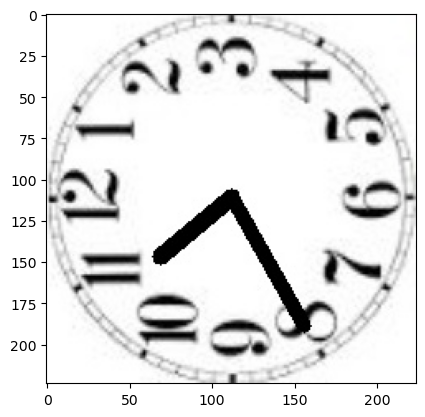

In [66]:
plt.imshow(img)

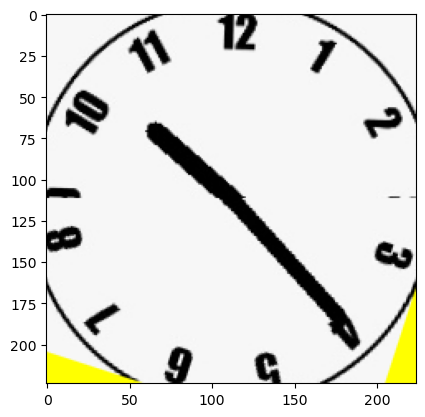

In [62]:
rotated = rotate(img, 3, hour, mins)[0]
plt.imshow(rotated)

In [42]:
idx = 530
img = train['path'][idx]
hour = int(train['hour'][idx])
mins = int(train['min'][idx])
print(f"hour : {hour}")
print(f"min  : {mins}")
img = cv2.imread(img)

hour : 11
min  : 35


In [43]:
print(type(hour))
print(type(mins))

<class 'int'>
<class 'int'>


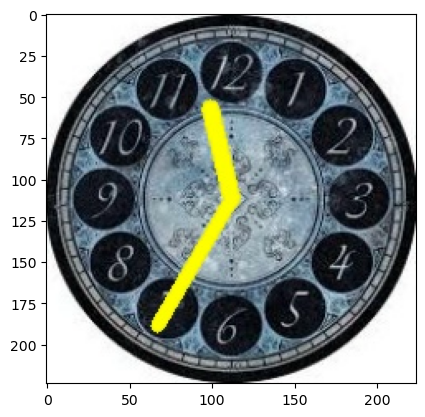

In [44]:
plt.imshow(img)

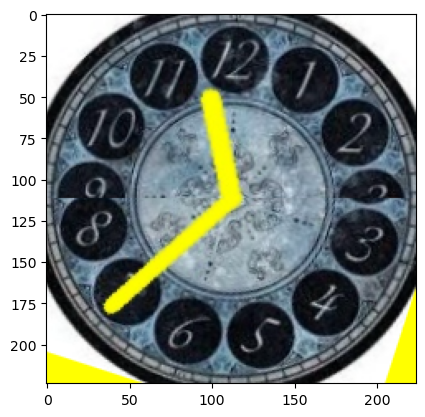

In [46]:
rotated = rotate(img, 3, hour, mins)[0]
plt.imshow(rotated)

In [ ]:
test1 accuracy : 0.7173611111111111
test2 accuracy : 0.07407407407407407

In [67]:
import pandas as pd

In [68]:
state = pd.read_csv("train_state_20230312.csv")

<AxesSubplot:>

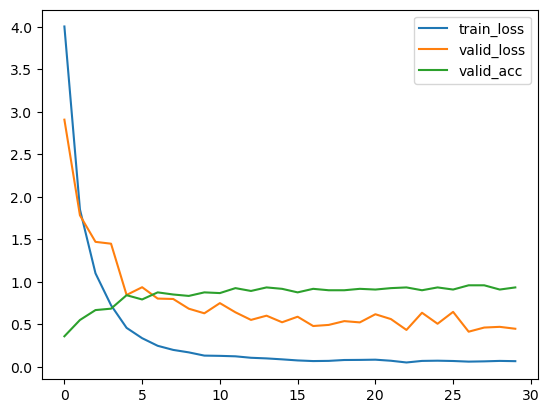

In [70]:
state[].plot()